In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
raw_df = pd.read_csv("./data/jeju_data_ver1/201901-202003.csv")

In [6]:
raw_df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [7]:
raw_df.describe()

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07
mean,2.019231e+05,1.412645e+00,2.804429e+00,6.196855e+01,2.441353e+06,1.260450e+02
std,3.619561e+01,4.923099e-01,1.375455e+00,3.559175e+02,1.726096e+07,9.669387e+02
min,2.019010e+05,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+01,1.000000e+00
25%,2.019040e+05,1.000000e+00,2.000000e+00,4.000000e+00,9.020000e+04,5.000000e+00
50%,2.019080e+05,1.000000e+00,3.000000e+00,8.000000e+00,2.526800e+05,1.200000e+01
75%,2.019110e+05,2.000000e+00,4.000000e+00,2.400000e+01,8.433372e+05,4.000000e+01
max,2.020030e+05,2.000000e+00,5.000000e+00,3.281300e+04,2.349524e+09,1.203570e+05


In [8]:
raw_df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

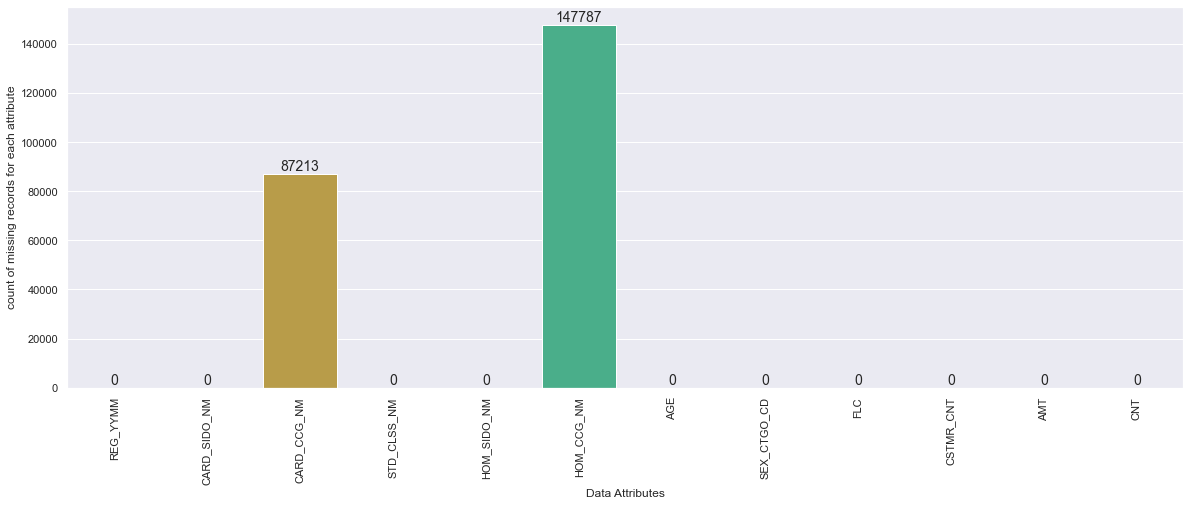

In [10]:
# 결측치 시각화
x = raw_df.columns
y = raw_df.isnull().sum()

plt.figure(figsize=(20,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [13]:
for f in raw_df.columns:
    na = raw_df[f].isnull().sum()
    print(f, "->", "Missing values:", na, "Percentage:", na/len(raw_df)*100)

REG_YYMM -> Missing values: 0 Percentage: 0.0
CARD_SIDO_NM -> Missing values: 0 Percentage: 0.0
CARD_CCG_NM -> Missing values: 87213 Percentage: 0.3531206352373524
STD_CLSS_NM -> Missing values: 0 Percentage: 0.0
HOM_SIDO_NM -> Missing values: 0 Percentage: 0.0
HOM_CCG_NM -> Missing values: 147787 Percentage: 0.5983814261614966
AGE -> Missing values: 0 Percentage: 0.0
SEX_CTGO_CD -> Missing values: 0 Percentage: 0.0
FLC -> Missing values: 0 Percentage: 0.0
CSTMR_CNT -> Missing values: 0 Percentage: 0.0
AMT -> Missing values: 0 Percentage: 0.0
CNT -> Missing values: 0 Percentage: 0.0
